In [1]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


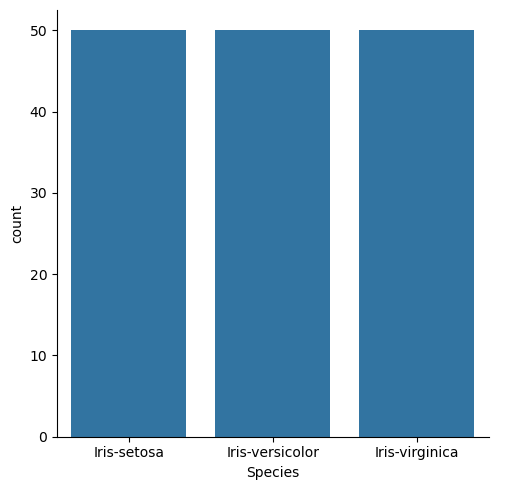

In [5]:
sns.catplot(data=df,x='Species',kind='count')

In [6]:
df.shape

(150, 6)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

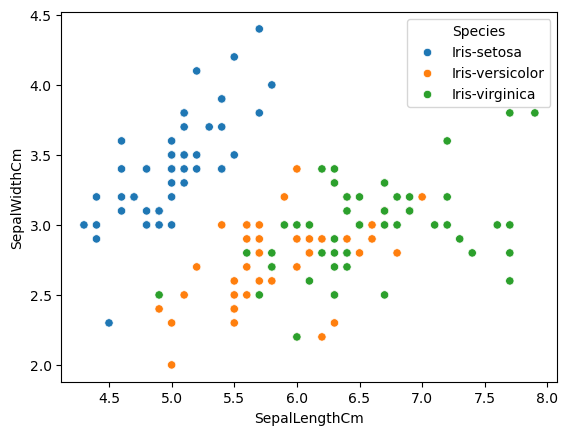

In [7]:
sns.scatterplot(data=df,x="SepalLengthCm", y='SepalWidthCm',  hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

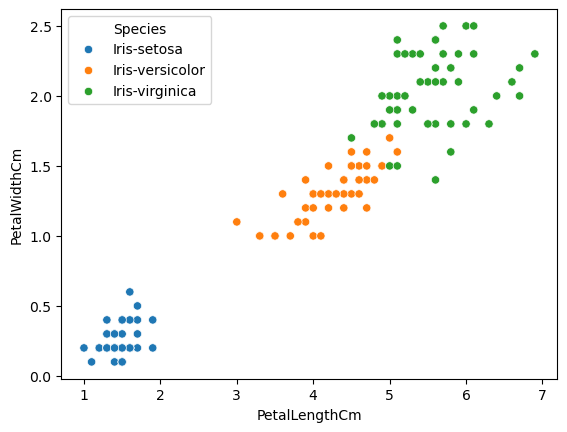

In [8]:
sns.scatterplot(data=df,x="PetalLengthCm", y='PetalWidthCm',  hue="Species")


sns.pairplot(df, hue='Species', size=2.5);

In [10]:
from sklearn.cluster import KMeans


df_copy = df.drop(['SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1)



In [18]:
 sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i , random_state=42)
    km.fit(df_copy)
    sse.append(km.inertia_) #how compact it is 

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

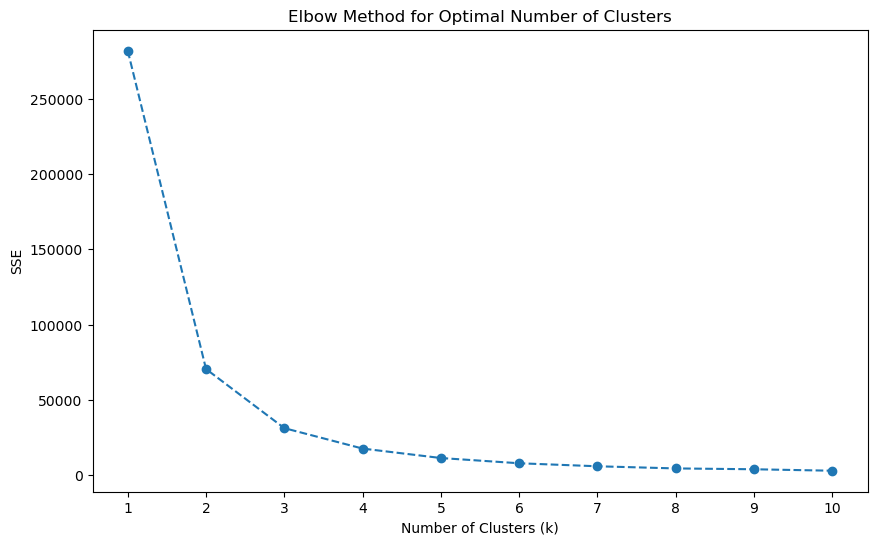

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xticks(range(1, 11))
plt.show()

In [13]:
km = KMeans(n_clusters=3, random_state=42)
df_copy['cluster'] = km.fit_predict(df_copy)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


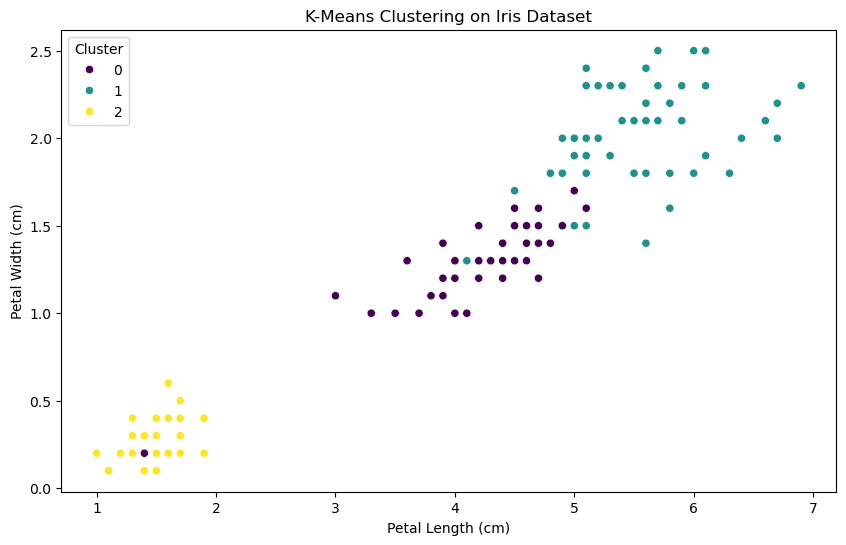

In [14]:
# Visualize clusters based on Petal Length and Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x="PetalLengthCm", y="PetalWidthCm", hue="cluster", palette="viridis")
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster")
plt.show()

In [20]:
# Step 3: Confusion Matrix and Heatmap
from sklearn.preprocessing import LabelEncoder

# Sample data
# Encode the species labels to numeric format for comparison
enc = LabelEncoder()
y_true = enc.fit_transform(df['Species'])

In [24]:
# Compute the confusion matrix comparing true labels and predicted clusters
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, df_copy['cluster'])

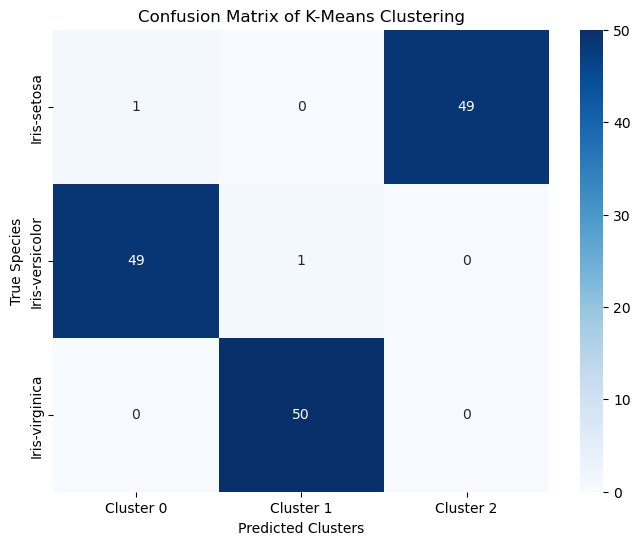

In [26]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'], 
            yticklabels=enc.classes_)
plt.xlabel('Predicted Clusters')
plt.ylabel('True Species')
plt.title('Confusion Matrix of K-Means Clustering')
plt.show()